# Keras Neural Networks

This is an example of how to use Keras to create a simple neural network. The code for this example was (shamelessly) lifted straight off of the Keras source code [here](https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py).

Keras is a wrapper for TensorFlow. It makes it super easy to build and train a wide range of neural networks with very little code. Here, we'll train our neural network to recognize MNIST digits.

In [7]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.optimizers import SGD,Adam
import numpy as np
import matplotlib.pyplot as plt



# Fully Connected Neural Network

### Define hyperparameters for our network
`batch_size` := the number of images we show per gradient update 

`num_classes` := the number of different classes (or bins) that we can place our data into. Determined by the dataset.

`epochs` := the number of times we go through the dataset during training. 

In [6]:
batch_size = 128
num_classes = 10 # 10 classes because we have 10 digits (0-9)
epochs = 5
learning_rate = 0.01

### Data Preparation
Keras has many built-in functions such as `to_categorical` that makes data manipulation very easy. Here we download the mnist dataset (using a built-in Keras function) and then preprocess it:

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape 2d (28x28) image data into 1d vectors (28x28 = 784-d vectors)
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

# set type to float, then clamp data to values between 0-1 instead of integers 0 - 255
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class labels into vectors. Ie 3 -> [0,0,0,1,0,0,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


Building a network in Keras is incredibly straight forward. Just instantiate a `Sequential` object and then use `.add` to add layers to you network. 

We're going to make the same network we made in the previous demo with 3 layers: a 784 neuron input, a 30 neuron hidden layer, and a 10 class output layer

In [13]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [15]:
learning_rate = 0.1

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=learning_rate),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


To train your model, just use use the `.fit` function. If `verbose=1`, then Keras prints out pretty summaries of how your network is doing while training

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s - loss: 0.4957 - acc: 0.8633 - val_loss: 0.3058 - val_acc: 0.9107
Epoch 2/5
60000/60000 [==============================] - 1s - loss: 0.2901 - acc: 0.9175 - val_loss: 0.2570 - val_acc: 0.9289
Epoch 3/5
60000/60000 [==============================] - 1s - loss: 0.2487 - acc: 0.9295 - val_loss: 0.2261 - val_acc: 0.9358
Epoch 4/5
60000/60000 [==============================] - 1s - loss: 0.2213 - acc: 0.9375 - val_loss: 0.2037 - val_acc: 0.9411
Epoch 5/5
60000/60000 [==============================] - 1s - loss: 0.2016 - acc: 0.9434 - val_loss: 0.1835 - val_acc: 0.9476
Test loss: 0.18350554651468992
Test accuracy: 0.9476


## Let's get fancier 
Here we're going to make our network deeper and also a fancy hack that helps to produce a better model known as Dropout.  On top of this, we use another Optimizer known as Adam instead of Stochastic Gradient Descent for training our model. You can find out more about ADAM here: 

You can read more about [Dropout here](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5), but the TL;DR is that Dropout randomly disables neurons in previous layers while training to regularize the action of the network. [Regularization](https://stats.stackexchange.com/questions/4961/what-is-regularization-in-plain-english) helps to prevent the phenomena of [overfitting](https://elitedatascience.com/overfitting-in-machine-learning)- the case where the network does very well on a training set by poorly on a test set.

We will build a network with these layers:
* input - 784 neurons
* hidden 1 - 512 neurons w/ relu activation
* dropout with prob. 0.2
* hidden 2 - 512 neurons w/ relu activation
* dropout with prob. 0.2
* output - 10 neurons w/ softmax activation

Again, we'll use a cross_entropy loss and an Adam optimizer.

In [16]:
# fancy
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s - loss: 0.2516 - acc: 0.9247 - val_loss: 0.1255 - val_acc: 0.9604
Epoch 2/5
60000/60000 [==============================] - 11s - loss: 0.1021 - acc: 0.9696 - val_loss: 0.0769 - val_acc: 0.9755
Epoch 3/5
60000/60000 [==============================] - 11s - loss: 0.0711 - acc: 0.9772 - val_loss: 0.0819 - val_acc: 0.9749
Epoch 4/5
60000/60000 [==============================] - 11s - loss: 0.0546 - acc: 0.9825 - val_loss: 0.0661 - val_acc: 0.9799
Epoch 5/5
60000/60000 [==============================] - 12s - loss: 0.0461 - acc: 0.9850 - val_loss: 0.0664 - val_acc: 0.9802
Test loss: 0.0664316877012694
Test accuracy: 0.9802


and as you can see, the network's performance has shot up significantly - despite only making a few changes. 

Prediction: 2
Actual: 2


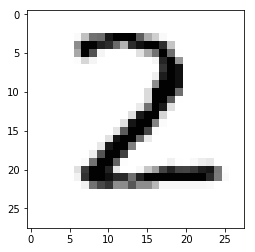

In [19]:
def predict(n):
    """Predict the nth test data sample using the model"""
    print("Prediction: " + str(np.argmax(np.round(model.predict(np.expand_dims(x_test[n], 0)), 2))))
    print("Actual: " + str(np.argmax(y_test[n])))
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys')
    plt.show()
    
predict(2354)

# Convolutional Neural Network

### Define hyperparameters for our network
`batch_size` := the number of images we show per gradient update 

`num_classes` := the number of different classes (or bins) that we can place our data into. Determined by the dataset.

`epochs` := the number of times we go through the dataset during training. 

In [20]:
batch_size = 128
num_classes = 10 # 10 classes because we have 10 digits (0-9)
epochs = 5

### Data Prep
This time, we don't need to reshape our data because we're using a CNN. The CNN performs _better_ with the 2D data because it preserves spatial information. However, we still want to clamp our data between 0 and 255 

In [21]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# set type to float, then clamp data to values between 0-1 instead of integers 0 - 255
x_train = x_train.reshape(list(x_train.shape) + [1])
x_test = x_test.reshape(list(x_test.shape) + [1])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class labels into vectors. Ie 3 -> [0,0,0,1,0,0,0,0,0,0]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

* input layer : 784 nodes (MNIST images size)
* first convolution layer : 5x5x32
* first max-pooling layer
* second convolution layer : 5x5x64
* second max-pooling layer
* third fully-connected layer : 1024 nodes
* output layer : 10 nodes (number of class for MNIST)

In [22]:
model = None

In [24]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total para

In [25]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 87s - loss: 0.1511 - acc: 0.9524 - val_loss: 0.0307 - val_acc: 0.9892
Epoch 2/5
60000/60000 [==============================] - 90s - loss: 0.0376 - acc: 0.9879 - val_loss: 0.0382 - val_acc: 0.9881
Epoch 3/5
60000/60000 [==============================] - 86s - loss: 0.0244 - acc: 0.9922 - val_loss: 0.0225 - val_acc: 0.9926
Epoch 4/5
60000/60000 [==============================] - 79s - loss: 0.0177 - acc: 0.9943 - val_loss: 0.0273 - val_acc: 0.9919
Epoch 5/5
60000/60000 [==============================] - 85s - loss: 0.0139 - acc: 0.9956 - val_loss: 0.0267 - val_acc: 0.9921
Test loss: 0.026710711972102626
Test accuracy: 0.9921
